# O Dataset e o Projeto: Passangers 
<hr>
<p> Thomas Bekhor, João Bresser, Marcos Paulo</p>

###  Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> O dataset é o conjunto de passageiros, que fizeram uma viagem interplanetar.</p>

### Features do Dataset:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Passengerid </b> - Numero individual de cada passageiro.</li>
    <li><b>Home Planet</b> - Local de origem do passageiro. </li>
    <li><b>CryoSleep</b> - Indica se o passageiro foi colocado em "CryoSleep"  </li>
    <li><b>Cabin</b> - Cabine que o passageiro estava. Deck/numero/lado </li>
    <li><b>Destination</b> - Local que o passageiro vai </li>
    <li><b>Age</b> - Idade do passageiro </li>
    <li><b>VIP</b> - Se o passageiro é VIP </li>
    <li><b>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</b> - Dinheiro que cada passageiro gastou na viagem </li>
    <li><b>Name</b> - Nome do passageiro </li>
    <li><b>Transported</b> - Se o passageiro foi transportado para outra dimensão </li>
</ul>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Classificação</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset. No final do projeto teremos um modelo de Classificação acurado para a target Transported.</p>
    
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
    

# <font color='red' style='font-size: 30px;'>Importando bibliotecas</font>
<hr style='border: 2px solid red;'>

In [260]:
%matplotlib inline
#bibliotecas matemáticas e graficas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#separação entre treino e teste
from sklearn.model_selection import train_test_split

#separação estratificada
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#resultados da modelagem
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

#fazer o cross validation
from sklearn.model_selection import cross_val_score


#encontrando os melhores features
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest

#serializar modelo
import joblib


#tuning de hiperparametros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from pprint import pprint

#from sklearn.linear_model import LinearRegression
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

In [261]:
RAND_SEED = 42
np.random.seed(RAND_SEED)

# <font color='red' style='font-size: 30px;'>Explorando o DataSet</font>
<hr style='border: 2px solid red;'>

Lendo a base de dados

In [262]:
df_passangers = pd.read_csv("DATA2_passengers.csv")

Entendendo como é o DataFrame

In [263]:
df_passangers.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [264]:
#df_passangers['Valor Bruto']=df_passangers['RoomService']+df_passangers['FoodCourt']+df_passangers['ShoppingMall']+df_passangers['Spa']+df_passangers['VRDeck']
#df_passangers

In [265]:
df_passangers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


Vendo as informações do nosso DataFrame

In [266]:
df_passangers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [267]:
df_passangers.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# <font color='red' style='font-size: 30px;'>Tratando Dados Nulos</font>
<hr style='border: 2px solid red;'>

In [268]:
df_passangers=df_passangers[df_passangers["Transported"].notna()]
#a coluna Transported é exencial para a nossa analise. (não tem nulo mas vou garantir)

In [269]:
#ver a quantidade de nao nulos e fazer input para os que tem quantidade relevante 
df_passangers=df_passangers[df_passangers["Destination"].notna()]
import math

SPA_medio=df_passangers['Spa'].mean()
SPA_medio=math.floor(SPA_medio)
df_passangers.update(df_passangers['Spa'].fillna(SPA_medio))
#df_passangers=df_passangers[df_passangers["Spa"].notna()]


df_passangers=df_passangers[df_passangers["HomePlanet"].notna()]
df_passangers=df_passangers[df_passangers["CryoSleep"].notna()]

shopping_medio=df_passangers['ShoppingMall'].mean()
shopping_medio=math.floor(shopping_medio)
df_passangers.update(df_passangers['ShoppingMall'].fillna(shopping_medio))
#df_passangers=df_passangers[df_passangers["ShoppingMall"].notna()]

df_passangers=df_passangers[df_passangers["Cabin"].notna()]

Age_medio=df_passangers["Age"].mean()
Age_medio=math.floor(Age_medio)
df_passangers.update(df_passangers["Age"].fillna(Age_medio))
#df_passangers=df_passangers[df_passangers["Age"].notna()]

VIP_medio=df_passangers["VIP"].mean()
VIP_medio=math.floor(VIP_medio)
df_passangers.update(df_passangers["VIP"].fillna(VIP_medio))
#df_passangers=df_passangers[df_passangers["VIP"].notna()]

RoomService_medio=df_passangers["RoomService"].mean()
RoomService_medio=math.floor(RoomService_medio)
df_passangers.update(df_passangers["RoomService"].fillna(RoomService_medio))
#df_passangers=df_passangers[df_passangers["RoomService"].notna()]

FoodCourt_medio=df_passangers["FoodCourt"].mean()
FoodCourt_medio=math.floor(FoodCourt_medio)
df_passangers.update(df_passangers["FoodCourt"].fillna(FoodCourt_medio))
#df_passangers=df_passangers[df_passangers["FoodCourt"].notna()]

VRDeck_medio=df_passangers["VRDeck"].mean()
VRDeck_medio=math.floor(VRDeck_medio)
df_passangers.update(df_passangers["VRDeck"].fillna(VRDeck_medio))
#df_passangers=df_passangers[df_passangers["VRDeck"].notna()]
#df_passangers=df_passangers[df_passangers["Valor Bruto"].notna()]
#retirei colunas nome e id pq é individual de cada e não ajuda na classificação

df_passangers.loc[:,["HomePlanet","CryoSleep","Cabin","Destination","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Transported"]]
df=df_passangers
print(df.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [270]:
df_passangers['Valor Bruto']=df_passangers['RoomService']+df_passangers['FoodCourt']+df_passangers['ShoppingMall']+df_passangers['Spa']+df_passangers['VRDeck']
df_passangers

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Valor Bruto
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0


In [271]:
df_passangers.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            178
Transported       0
Valor Bruto       0
dtype: int64

# <font color='red' style='font-size: 30px;'>Manutenção Variaveis</font>
<hr style='border: 2px solid red;'>

In [272]:
df["Primeira Cabin"],df["Segunda Cabin"],df["Terceira Cabin"]=df["Cabin"].str.split('/').str
del df["Cabin"]
del df['Name']
del df['PassengerId']

# tirando o valor bruto a acuracia fica melhor
del df['Valor Bruto']

C:\Users\joaob\AppData\Local\Temp/ipykernel_500/253686312.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df["Primeira Cabin"],df["Segunda Cabin"],df["Terceira Cabin"]=df["Cabin"].str.split('/').str


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7920 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      7920 non-null   object 
 1   CryoSleep       7920 non-null   object 
 2   Destination     7920 non-null   object 
 3   Age             7920 non-null   float64
 4   VIP             7920 non-null   object 
 5   RoomService     7920 non-null   float64
 6   FoodCourt       7920 non-null   float64
 7   ShoppingMall    7920 non-null   float64
 8   Spa             7920 non-null   float64
 9   VRDeck          7920 non-null   float64
 10  Transported     7920 non-null   bool   
 11  Primeira Cabin  7920 non-null   object 
 12  Segunda Cabin   7920 non-null   object 
 13  Terceira Cabin  7920 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 874.0+ KB


In [274]:
df["HomePlanet"]=df["HomePlanet"].astype('category')
df["HomePlanet"].cat.categories=[0,1,2]
# 0 é Earth , Europa é 1 e Mars é 2

df["Destination"]=df["Destination"].astype('category')
print(df["Destination"].cat.categories)
df["Destination"].cat.categories=[0,1,2]
# 0 é 55 Canccri e 1 é  PSO J318.5-22, 2 é TRAPPIST-1e

df["Primeira Cabin"]=df["Primeira Cabin"].astype('category')
df["Primeira Cabin"].cat.categories=[0,1,2,3,4,5,6,7]
#0 é A, 1 é B ....6 é F e 7 é T
df["Segunda Cabin"]=df["Segunda Cabin"].astype('category')
#analisando posso deletar pq tem pouquissimos numeros para cada variavel
del df["Segunda Cabin"]
df["Terceira Cabin"]=df["Terceira Cabin"].astype("category")
df["Terceira Cabin"].cat.categories=[0,1]
#P=0 e S=1

Index(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype='object')


# <font color='red' style='font-size: 30px;'>Explorando o target</font>
<hr style='border: 2px solid red;'

In [275]:
df.groupby(by='HomePlanet')["Transported"].value_counts(normalize=True)

HomePlanet  Transported
0           False          0.574884
            True           0.425116
1           True           0.659757
            False          0.340243
2           True           0.522533
            False          0.477467
Name: Transported, dtype: float64

In [276]:
df.groupby(by='Primeira Cabin')["Transported"].value_counts(normalize=True)

Primeira Cabin  Transported
0               False          0.508264
                True           0.491736
1               True           0.738714
                False          0.261286
2               True           0.673324
                False          0.326676
3               False          0.564444
                True           0.435556
4               False          0.645679
                True           0.354321
5               False          0.563320
                True           0.436680
6               True           0.520267
                False          0.479733
7               False          0.666667
                True           0.333333
Name: Transported, dtype: float64

In [277]:
df.groupby(by='Terceira Cabin')["Transported"].value_counts(normalize=True)

Terceira Cabin  Transported
0               False          0.547102
                True           0.452898
1               True           0.553835
                False          0.446165
Name: Transported, dtype: float64

In [278]:
df.groupby(by='CryoSleep')["Transported"].value_counts(normalize=True)

CryoSleep  Transported
False      False          0.669223
           True           0.330777
True       True           0.814462
           False          0.185538
Name: Transported, dtype: float64

In [279]:
df.groupby(by='Destination')["Transported"].value_counts(normalize=True)

Destination  Transported
0            True           0.608696
             False          0.391304
1            True           0.508748
             False          0.491252
2            False          0.528738
             True           0.471262
Name: Transported, dtype: float64

In [280]:

df['Faixa_idade']=pd.cut(df['Age'],np.arange(0,85,5))
oi=df['Faixa_idade'].value_counts(normalize=True)
pd.crosstab(df['Transported'],df['Faixa_idade'])

Faixa_idade,"(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]"
Transported,,,,,,,,,,,,,,,,
False,82,78,205,544,733,639,442,376,269,192,142,92,66,19,15,7
True,214,125,268,530,603,630,379,327,260,190,127,104,61,23,9,3


In [281]:
df.groupby(by='VIP')["Transported"].value_counts(normalize=True)

VIP    Transported
False  True           0.506527
       False          0.493473
True   False          0.606557
       True           0.393443
Name: Transported, dtype: float64

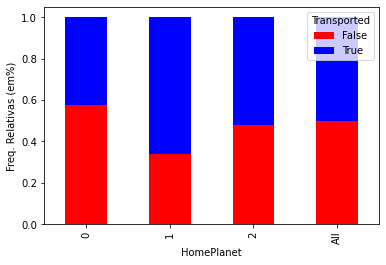

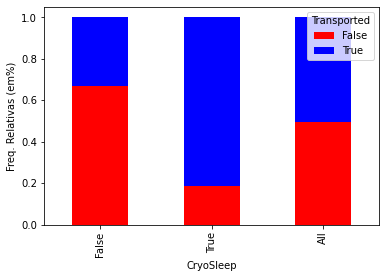

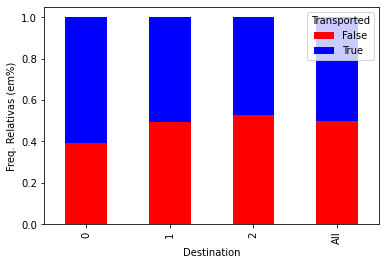

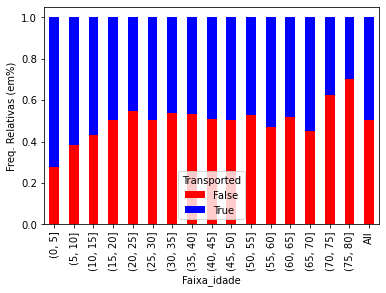

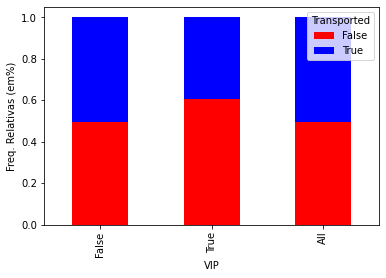

In [282]:
lista=["HomePlanet",'CryoSleep','Destination','Faixa_idade','VIP']
cores = ['red','blue','green','darkgreen','yellow','purple','pink','orange']
n=0
#seria bom fazer uma figura
for i in lista:
    Transported_x_y=pd.crosstab(df[i], df['Transported'], normalize='index',margins=True).round(4)
    Transported_x_y.plot.bar(color=cores, stacked=True)
    plt.ylabel("Freq. Relativas (em%)")
    plt.xlabel(i)
plt.show()

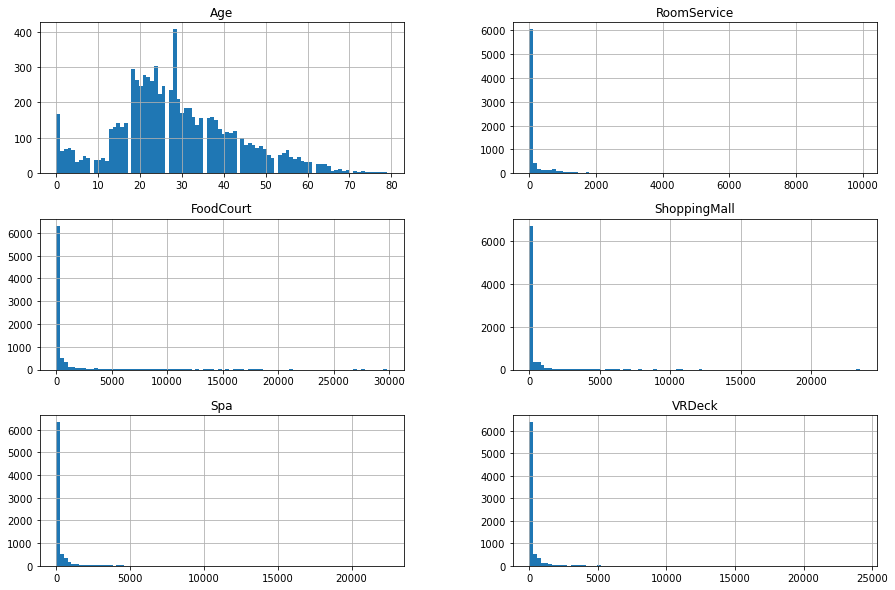

In [283]:
BINS= int(np.sqrt(len(df.index)))
df.hist(bins=BINS,figsize=(15,10));

In [284]:
del df["Faixa_idade"]

# <font color='red' style='font-size: 30px;'>Treino e Teste</font>
<hr style='border: 2px solid red;'>

In [285]:
ypassanger=df.loc[:,["Transported"]]
Xpassanger=df.drop(["Transported"],axis=1)

In [286]:
X_trainpassanger, X_testpassanger, y_trainpassanger, y_testpassanger = train_test_split(
    Xpassanger,
    ypassanger,                  
    test_size=0.3,
    random_state=RAND_SEED,
)
X_testpassanger.head()


#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X_trainpassanger,y_trainpassanger)
#y= X_testpassanger

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Primeira Cabin,Terceira Cabin
5377,0,False,0,50.0,False,57.0,29.0,0.0,0.0,643.0,5,1
8278,0,False,0,50.0,False,0.0,433.0,4.0,0.0,2020.0,5,1
1849,1,True,0,26.0,True,0.0,0.0,0.0,0.0,0.0,1,1
2159,1,False,2,67.0,False,0.0,4715.0,0.0,599.0,6.0,3,1
3321,0,True,1,26.0,False,0.0,0.0,0.0,0.0,0.0,6,0


In [287]:
y_testpassanger.head()

,Transported
5377,False
8278,False
1849,True
2159,True
3321,True


# <font color='red' style='font-size: 30px;'>Modelos de Classificação</font>
<hr style='border: 2px solid red;'>

In [288]:

dtc=DecisionTreeClassifier()
y_trainpassanger=y_trainpassanger.astype('int')
dtc.fit(X_trainpassanger, y_trainpassanger)
resultado_dtc=dtc.predict(X_testpassanger)

In [289]:
# Criando modelo e treinando com os dados de treino
clr = LogisticRegression()
clr.fit(X_trainpassanger, y_trainpassanger)
# Fazendo a predição nos dados de treino
resultado_clr = clr.predict(X_testpassanger)

c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed

In [290]:
# Criando modelo e treinando com os dados de treino
knn = KNeighborsClassifier()
knn.fit(X_trainpassanger, y_trainpassanger)
# Fazendo a predição nos dados de treino
resultado_knn = knn.predict(X_testpassanger)

c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [291]:
nb = GaussianNB()
nb.fit(X_trainpassanger, y_trainpassanger)
# Fazendo a predição nos dados de treino
resultado_nb = nb.predict(X_testpassanger)

c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [292]:
SVM = SVC()
SVM.fit(X_trainpassanger, y_trainpassanger)
# Fazendo a predição nos dados de treino
resultado_SVM = SVM.predict(X_testpassanger)

c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# <font color='red' style='font-size: 30px;'>Desempenho dos modelos</font>
<hr style='border: 2px solid red;'>

## Resultado Decision Tree

In [293]:

print(classification_report(y_testpassanger, resultado_dtc))

              precision    recall  f1-score   support

       False       0.74      0.71      0.72      1180
        True       0.72      0.75      0.74      1196

    accuracy                           0.73      2376
   macro avg       0.73      0.73      0.73      2376
weighted avg       0.73      0.73      0.73      2376



In [294]:
def display_scores(scores):
    print('Scores:', scores.round(decimals=2))
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [295]:
tree_scores = cross_val_score(
    dtc,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
    n_jobs=-1
)

tree_rmse_scores = tree_scores
print(tree_rmse_scores)

display_scores(tree_rmse_scores)

[0.70990991 0.72972973 0.73333333 0.75495495 0.71299639 0.77075812
 0.74909747 0.72563177 0.74909747 0.72382671]
Scores: [0.71 0.73 0.73 0.75 0.71 0.77 0.75 0.73 0.75 0.72]
Mean: 0.7359335870166195
Standard deviation: 0.018499827750631703


## Resultado KNN

In [296]:
print(classification_report(y_testpassanger, resultado_knn))

              precision    recall  f1-score   support

       False       0.80      0.77      0.78      1180
        True       0.78      0.80      0.79      1196

    accuracy                           0.79      2376
   macro avg       0.79      0.79      0.79      2376
weighted avg       0.79      0.79      0.79      2376



In [297]:
knn_scores = cross_val_score(
    knn,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
    n_jobs=-1,
)
print(knn_scores)

display_scores(knn_scores)

[0.74774775 0.74774775 0.77657658 0.79279279 0.74909747 0.78700361
 0.76534296 0.79061372 0.7833935  0.73646209]
Scores: [0.75 0.75 0.78 0.79 0.75 0.79 0.77 0.79 0.78 0.74]
Mean: 0.7676778222265588
Standard deviation: 0.019939889584461207


## Resultados Regressão Logística 
(é de classificação)

In [298]:
print(classification_report(y_testpassanger, resultado_clr))

              precision    recall  f1-score   support

       False       0.79      0.76      0.78      1180
        True       0.77      0.81      0.79      1196

    accuracy                           0.78      2376
   macro avg       0.78      0.78      0.78      2376
weighted avg       0.78      0.78      0.78      2376



In [299]:
clr_scores = cross_val_score(
    clr,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
    n_jobs=-1
    
)


print(clr_scores)

display_scores(clr_scores)

[0.78738739 0.78018018 0.78918919 0.76396396 0.79422383 0.78880866
 0.76173285 0.79602888 0.79783394 0.7833935 ]
Scores: [0.79 0.78 0.79 0.76 0.79 0.79 0.76 0.8  0.8  0.78]
Mean: 0.784274238137054
Standard deviation: 0.011889487432548498


## Resultados Gaussian Classifier

In [300]:
print(classification_report(y_testpassanger, resultado_nb))

              precision    recall  f1-score   support

       False       0.86      0.49      0.63      1180
        True       0.65      0.92      0.76      1196

    accuracy                           0.71      2376
   macro avg       0.76      0.71      0.69      2376
weighted avg       0.75      0.71      0.69      2376



In [301]:
nb_scores = cross_val_score(
    nb,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
    n_jobs=-1
)

print(nb_scores)

display_scores(nb_scores)

[0.7009009  0.70990991 0.72252252 0.71531532 0.68231047 0.72382671
 0.70938628 0.70577617 0.73104693 0.68772563]
Scores: [0.7  0.71 0.72 0.72 0.68 0.72 0.71 0.71 0.73 0.69]
Mean: 0.7088720850814714
Standard deviation: 0.014732183352201136


## Resultados SVC 

In [302]:
print(classification_report(y_testpassanger, resultado_SVM))

              precision    recall  f1-score   support

       False       0.86      0.69      0.77      1180
        True       0.74      0.89      0.81      1196

    accuracy                           0.79      2376
   macro avg       0.80      0.79      0.79      2376
weighted avg       0.80      0.79      0.79      2376



In [303]:
SVM_scores = cross_val_score(
    SVM,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
    n_jobs=-1
)

print(SVM_scores)

display_scores(SVM_scores)

[0.75495495 0.77657658 0.77297297 0.78198198 0.77256318 0.8032491
 0.77256318 0.79061372 0.80505415 0.74909747]
Scores: [0.75 0.78 0.77 0.78 0.77 0.8  0.77 0.79 0.81 0.75]
Mean: 0.7779627280710313
Standard deviation: 0.01731253194202874


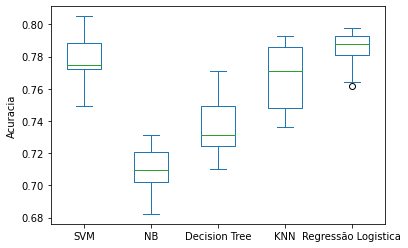

In [304]:
pd.DataFrame({
    'SVM': SVM_scores,
    'NB': nb_scores,
    'Decision Tree': tree_scores,
    'KNN': knn_scores,
     'Regressão Logistica': clr_scores,
    
}).plot.box(
    xlabel='Classificador',
    ylabel='Acuracia',
    figsize=(6, 4),
);

# <font color='red' style='font-size: 30px;'>Otimização de Modelos</font>
<hr style='border: 2px solid red;'>
<p>Os melhores modelos foram Regresão Logistica e SVM </p>

In [311]:
X_trainpassanger.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Primeira Cabin,Terceira Cabin
4415,1,True,2,35.0,False,0.0,0.0,0.0,0.0,0.0,1,0
7584,0,False,1,71.0,False,48.0,43.0,0.0,78.0,534.0,5,0
4151,0,True,1,22.0,False,0.0,0.0,0.0,0.0,0.0,6,0
1782,1,False,0,19.0,False,0.0,748.0,158.0,5037.0,44.0,3,0
4620,2,False,0,31.0,False,725.0,0.0,747.0,0.0,0.0,5,0


In [321]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_classif

f_clas=SelectKBest(f_classif,k=7)
f_clas.fit(X_trainpassanger,y_trainpassanger)

f_clas_support=f_clas.get_support()
f_feature=X_trainpassanger.loc[:,f_clas_support].columns.tolist()
f_feature
#from sklearn.feature_selection import chi2
#chi2(X_testpassanger,y_testpassanger)

c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['HomePlanet',
 'CryoSleep',
 'Destination',
 'RoomService',
 'Spa',
 'VRDeck',
 'Primeira Cabin']

In [322]:
from sklearn.feature_selection import mutual_info_classif
mi_clas=SelectKBest(mutual_info_classif,k=7)
mi_clas.fit(X_trainpassanger,y_trainpassanger)


c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SelectKBest(k=7,
            score_func=<function mutual_info_classif at 0x000002C91B270430>)

In [324]:
mi_clas_support=mi_clas.get_support()
mi_feature=X_testpassanger.loc[:,mi_clas_support].columns.tolist()
mi_feature

['CryoSleep',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Primeira Cabin']

# boxplot

KeyError: 'Column not found: Valor Bruto'

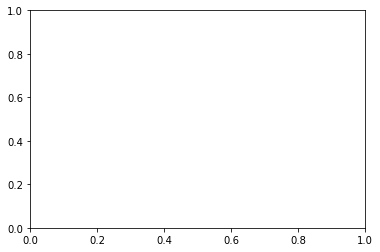

In [306]:
df_passangers.boxplot(['Valor Bruto'], by=['Transported'])
#fazer modelo com e sem para ver se muda alguma coisa
#fazer o predict para o perfil de uma pessoa e de outra pessoa que so muda a variavel do valor bruto
plt.ylim(-2000,5000)

<AxesSubplot:title={'center':'Age'}, xlabel='[Transported]'>

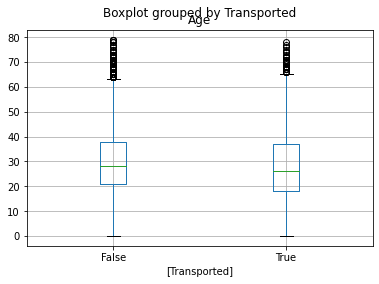

In [ ]:
df_passangers.boxplot(['Age'], by=['Transported'])